In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [25]:
import os
os.chdir('C:/Users/yaser/Finance/regression/Python 2')
data = pd.read_excel('Housing.xlsx')

In [26]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [27]:
data.tail()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
15,900000,1325,TX,6,1997
16,730000,1350,TX,6,2000
17,750000,1600,TX,6,1992
18,650000,950,TX,2,1987
19,680000,1250,TX,4,2000


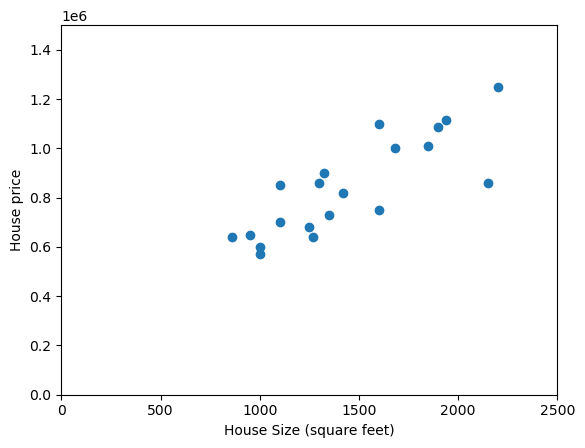

In [28]:
plt.scatter(data['House Size (sq.ft.)'],data['House Price'])
plt.xlabel('House Size (square feet)')
plt.ylabel('House price')
plt.axis([0, 2500, 0, 1.5e6])
plt.show()

C:\Users\yaser\AppData\Local\Temp\ipykernel_21912\3096398317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['House Price'])


<AxesSubplot:xlabel='House Price', ylabel='Density'>

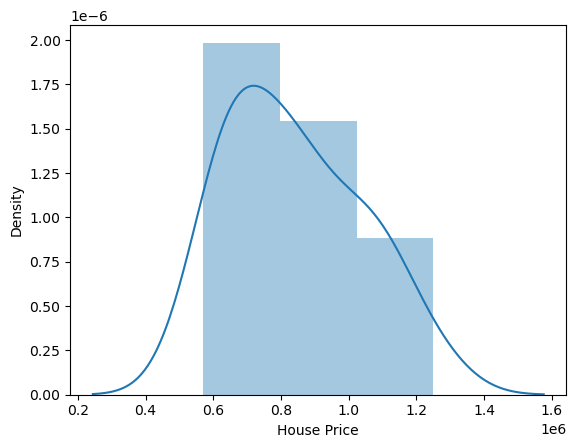

In [29]:
sns.distplot(data['House Price'])


# Linear regression (1st method)

In [30]:
x = data[['House Size (sq.ft.)']]
y = data[['House Price']]
reg = LinearRegression()
reg.fit(x,y)
y_hat = reg.predict(x)

print('R2 is: ', reg.score(x, y))
print('Beta is: ', reg.coef_)
print('alpha is: ', reg.intercept_)

R2 is:  0.678279986579124
Beta is:  [[401.91628632]]
alpha is:  [260806.2360561]


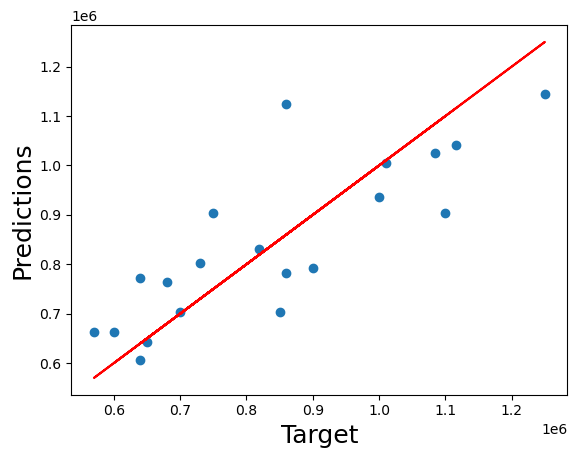

In [31]:
plt.scatter(y, y_hat)
plt.plot(y, y,color="red")
plt.xlabel('Target',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

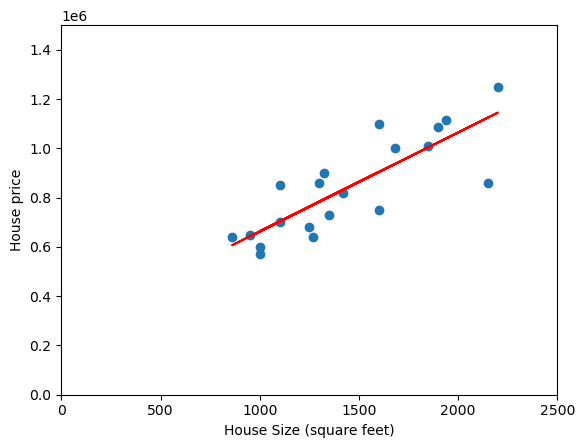

In [32]:
plt.scatter(x,y)
plt.plot(x, y_hat, color='r')
plt.xlabel('House Size (square feet)')
plt.ylabel('House price')
plt.axis([0, 2500, 0, 1.5e6])
plt.show()

# Linear regression (2nd method: ordinary least square)

In [35]:
x1 = sm.add_constant(x)
reg = sm.OLS(y,x1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.13e-06
Time:                        12:00:55   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""